In [1]:
# 步骤总览

## 1. EDA
# 1.1 读取数据与基本结构查看
# 1.2 检查缺失值与重复值
# 1.3 目标变量（y）的分布分析：类别不平衡情况
# 1.4 特征（X）的统计特性分析（均值、方差等）
# 1.5 特征相关性分析
# 1.6 降维可视化（如 PCA 或 t-SNE）
# 1.7 小结与对建模的启示

## 2. Feature Selection
# 2.1 T-test method  (最终选择)
# 2.2 mean-value method
# 2.3 feature_importance_ method

## 3. Model Training
# 3.1 Logistic Regression
# 3.2 Random Forest
# 3.3 XGBoost

## 4. Distribution shift
# 4.1 Covariate Shift
# 4.2 Label Shift
# 4.3 Concept shift
# 4.4 Solution


In [2]:
## 1. EDA

In [3]:
# 1.1 读取数据与基本结构查看

In [114]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import ks_2samp, entropy

In [5]:
# Read data and basic structure view

In [6]:
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")

# 查看数据维度
print("特征数据维度:", X_train.shape)   
print("标签数据维度:", y_train.shape)   

特征数据维度: (10000, 300)
标签数据维度: (10000, 1)


In [7]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.617940,-0.391980,0.13278,0.032551,0.55201,0.83393,-0.837550,-0.874060,0.43930,0.268260,...,-0.45454,0.36452,1.575300,-0.620320,-0.25371,-0.447750,-0.038273,-0.019938,-0.195500,0.428830
1,0.333860,-1.549100,1.67050,0.793560,0.80251,-0.07206,-0.068276,3.302400,0.52045,0.685720,...,-0.36913,1.74080,1.286600,-0.013396,-1.53930,0.833540,0.472610,0.513030,-0.743140,1.219900
2,0.040399,-0.608070,1.62080,-0.355970,0.12105,1.35250,0.373200,1.111700,0.35894,-0.344100,...,-1.40230,-0.24763,0.507050,0.708220,-0.60083,0.911040,0.009979,-0.475990,-0.094731,-0.008521
3,1.723600,0.195290,1.03880,-3.009100,-0.33222,0.91067,0.666690,0.717250,3.05850,1.489900,...,-1.21540,-0.25284,-1.307800,-0.445660,0.27918,0.264670,-0.149360,1.492900,-1.176700,-1.854500
4,-1.032300,1.900100,-1.46010,0.383710,-0.51039,0.74481,-0.914660,-0.865880,-0.34426,0.869650,...,1.32230,0.06020,-1.079000,-0.617050,1.18450,-0.210630,-0.105870,-0.412040,1.409700,0.133350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.821000,-0.016804,0.36978,-1.652500,1.32370,-0.67655,-1.238000,-0.764210,0.16283,-0.240030,...,-1.25470,-0.76602,1.453600,1.954500,0.47550,-1.824700,-0.227030,1.879700,-1.123800,1.309600
9996,-0.636390,-0.403470,0.81521,-0.665990,-2.16210,2.03190,0.278910,0.169180,0.52821,-0.217570,...,0.42273,-0.07438,-0.958710,-0.030666,-0.43114,0.075285,-0.892370,-0.677320,-1.330200,-0.809090
9997,0.773410,0.157330,-0.82969,-2.569100,1.33060,-0.45354,0.154800,0.010011,0.79613,0.606680,...,-1.15410,-1.75520,-1.645100,0.316050,-0.49966,0.997910,-1.389800,0.773250,0.049626,-0.500440
9998,-0.382970,1.011900,-2.12320,1.385600,0.30195,-0.45940,-0.050270,0.591280,1.49210,0.012371,...,0.24839,0.20263,0.010861,-0.775840,-0.98314,0.216800,1.323800,0.450360,1.586200,-0.289050


In [8]:
y_train

,label
0,10
1,5
2,5
3,5
4,5
...,...
9995,19
9996,5
9997,17
9998,24


In [9]:
 # 1.2 检查缺失值与重复值

In [10]:
# 检查特征和标签中的缺失值数量
missing_values_X = X_train.isnull().sum().sum()
missing_values_y = y_train.isnull().sum().sum()

print(f"特征数据缺失值数量：{missing_values_X}")
print(f"标签数据缺失值数量：{missing_values_y}")

# 检查特征数据是否存在重复行
duplicate_rows_X = X_train.duplicated().sum()
print(f"特征数据中的重复行数量：{duplicate_rows_X}")


特征数据缺失值数量：0
标签数据缺失值数量：0
特征数据中的重复行数量：0


In [11]:
# 结论1：数据无缺失值

In [12]:
# 1.3 目标变量（y）的分布分析：类别不平衡情况

In [13]:
# 统计label中每一个类别的个数
class_counts = y_train.value_counts()
class_counts

label
5        4479
10       1081
6         553
8         516
12        457
24        385
17        354
26        278
21        269
14        264
4         238
25        184
19        177
20        153
27        107
7         103
11         78
3          65
13         62
18         60
23         41
15         26
9          25
0          18
1           7
22          7
2           7
16          6
Name: count, dtype: int64

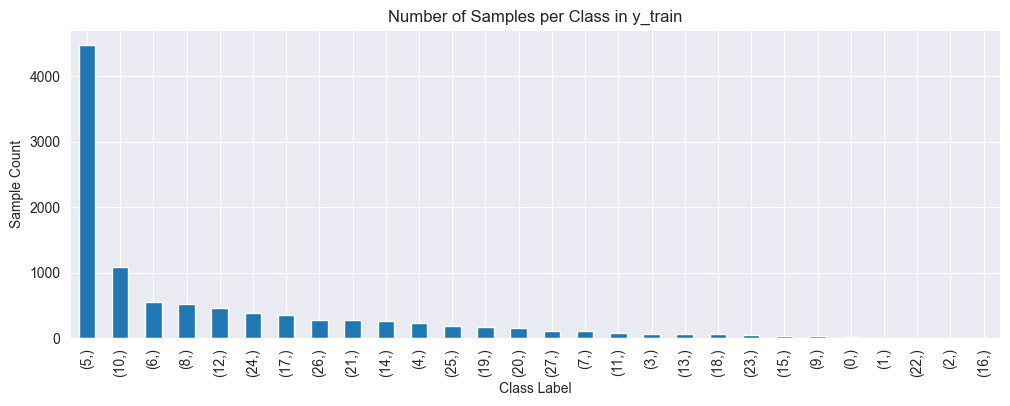

In [14]:
# 绘制柱状图进行表示
plt.figure(figsize=(12,4))
class_counts.plot(kind='bar')
plt.title("Number of Samples per Class in y_train")
plt.xlabel("Class Label")
plt.ylabel("Sample Count")
plt.show()

In [15]:
# 结论2：可以看出来类别分布是完全不均衡的，存在极端多类和极端少类

In [16]:
# 1.4 特征的统计特性分析

In [17]:
summary_stats = X_train.describe().T  # 每列为一个特征
print("每个特征的均值、标准差、最小值和最大值：")
print(summary_stats[['mean', 'std', 'min', 'max']])

每个特征的均值、标准差、最小值和最大值：
         mean       std      min      max
0   -0.021449  0.986789  -8.1638   4.5750
1   -0.000912  1.008141 -11.9820   4.2322
2    0.012368  1.009709  -3.5020   6.5868
3    0.045447  0.985909  -4.7040   3.8679
4    0.034961  0.988168  -7.0178   7.7052
..        ...       ...      ...      ...
295  0.021120  1.002988  -4.4358   4.6608
296  0.055394  1.000607  -3.7089  11.4290
297  0.013260  0.990364  -8.5983   3.9451
298 -0.045870  0.994845  -5.6691   4.2649
299 -0.096509  0.992540  -5.2105   4.1854

[300 rows x 4 columns]


In [18]:
# 均值分布直方图

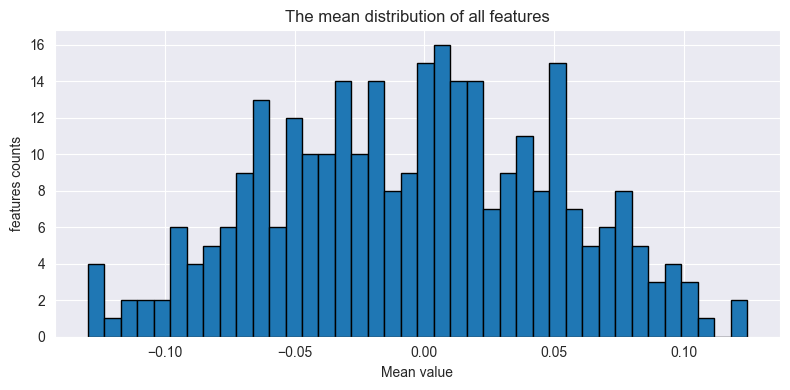

In [19]:
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['mean'], bins=40, edgecolor='black')
plt.title("The mean distribution of all features")
plt.xlabel("Mean value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# 标准差分布直方图

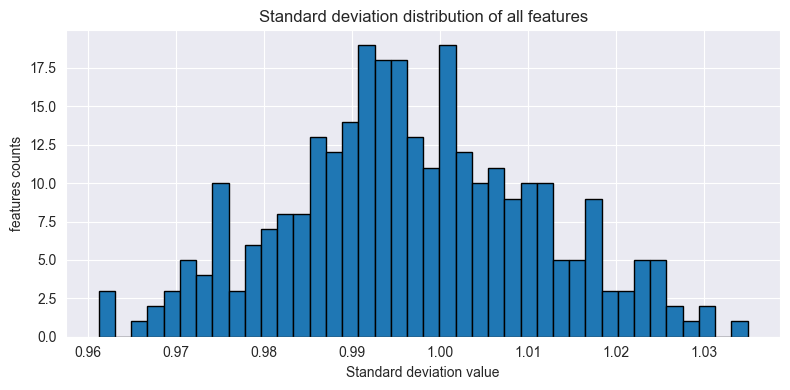

In [21]:
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['std'], bins=40, edgecolor='black')
plt.title("Standard deviation distribution of all features")
plt.xlabel("Standard deviation value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# 结论3：标准差分布集中，说明原数据已经经过了标准化

In [23]:
# 最小值分布直方图

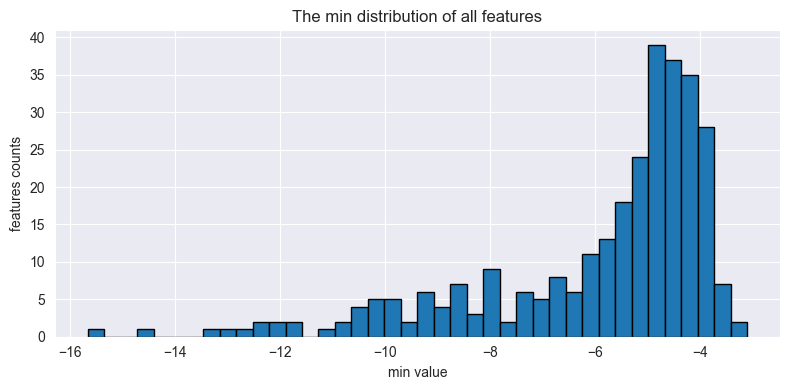

In [24]:
# 绘制直方图
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['min'], bins=40, edgecolor='black')
plt.title("The min distribution of all features")
plt.xlabel("min value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# 最大值分布直方图

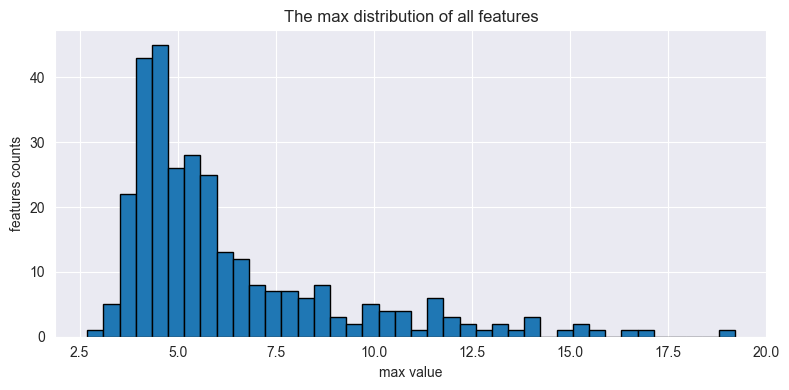

In [26]:
# 绘制直方图
plt.figure(figsize=(8, 4))
plt.hist(summary_stats['max'], bins=40, edgecolor='black')
plt.title("The max distribution of all features")
plt.xlabel("max value")
plt.ylabel("features counts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# 对标准差进行分析

In [28]:
# 方差为 0 的特征
zero_var_cols = summary_stats[summary_stats['std'] == 0].index.tolist()

# 方差低于阈值0.01的值的数量
low_var_cols = summary_stats[summary_stats['std'] < 0.01].index.tolist()

print(f"方差为 0 的特征数量：{len(zero_var_cols)}")
print(f"方差低于 0.01 的特征数量：{len(low_var_cols)}")


方差为 0 的特征数量：0
方差低于 0.01 的特征数量：0


In [29]:
# 分析离群点

In [30]:
# IQR检测法检测离群点
outlier_counts = []

# 遍历每个特征列
for col in X_train.columns:
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1

    # 定义异常值区间
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 计算该列中离群值的数量
    outliers = ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).sum()
    outlier_counts.append((col, outliers))

# 按离群值数量排序
outlier_counts_sorted = sorted(outlier_counts, key=lambda x: x[1], reverse=True)

# 显示离群值最多的前 10 个特征
print("离群值数量最多的前 10 个特征：")
for col, count in outlier_counts_sorted[:10]:
    print(f"特征 {col}: 离群值数量 = {count}")


离群值数量最多的前 10 个特征：
特征 259: 离群值数量 = 271
特征 59: 离群值数量 = 252
特征 119: 离群值数量 = 252
特征 84: 离群值数量 = 246
特征 33: 离群值数量 = 243
特征 242: 离群值数量 = 243
特征 8: 离群值数量 = 241
特征 188: 离群值数量 = 239
特征 180: 离群值数量 = 237
特征 165: 离群值数量 = 236


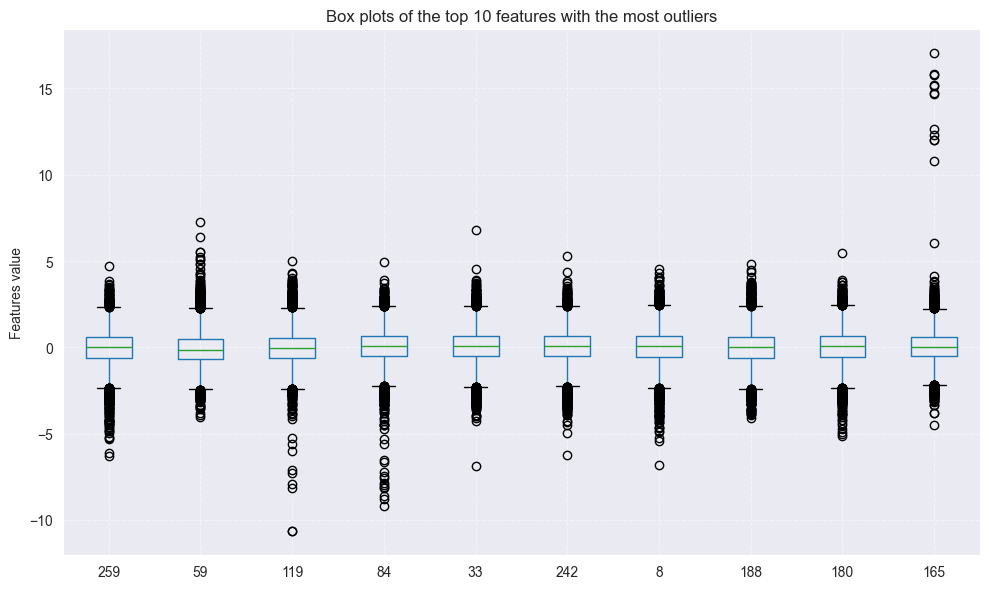

In [31]:
top_outlier_features = [col for col, _ in outlier_counts_sorted[:10]]

plt.figure(figsize=(10, 6))
X_train[top_outlier_features].boxplot()
plt.title("Box plots of the top 10 features with the most outliers")
plt.ylabel("Features value")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [32]:
# 结论4：正常情况下，IQR方法下的离群值总数占总样本数量的1%-5%，但该数据多个特征的离群点数目出现了200+个。
# 这代表这些特征的分布是非对称的、长尾的、偏态的

In [33]:
# 小结1：该数据可能不适合用于敏感模型，如Logistics Regression, SVM, KNN, Neural Network
# 原因： 
# Logistics Regression: 某一维特征突然变得极大（比如 999），那这个维度的权重w就会被迫减小，以“抵消”这个巨大值。
# SVM / KNN : 距离中心很远的点变成“伪最近邻”,SVM 边界被极端点推得很远，导致分类性能下降
# Neural Network: 输入某一维有异常大值，激活函数输入过大 → 梯度爆炸或消失，导致模型训练不稳定。

In [34]:
# 正态性分析

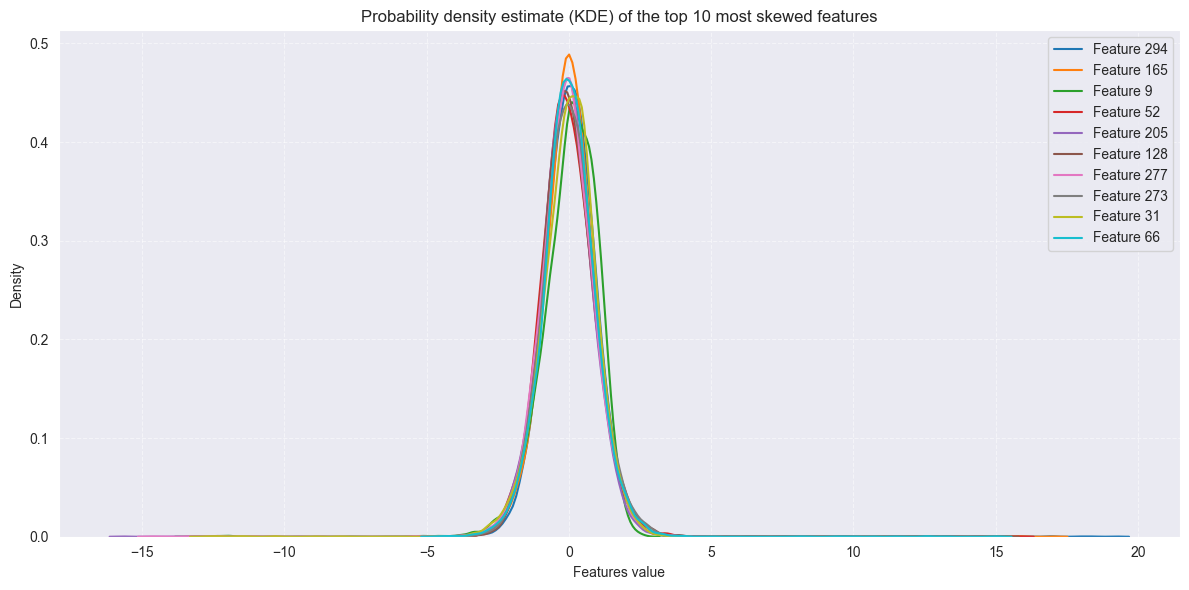

In [35]:
# 计算每个特征的偏度（skewness）并取绝对值排序
skews = X_train.skew().abs().sort_values(ascending=False)

# 获取偏态最大的前10个特征列索引
top_skew_features = skews.head(10).index.tolist()

# 绘制 KDE 图（放在一张图里）
plt.figure(figsize=(12, 6))
for col in top_skew_features:
    sns.kdeplot(X_train[col], label=f"Feature {col}", linewidth=1.5)

plt.title("Probability density estimate (KDE) of the top 10 most skewed features")
plt.xlabel("Features value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [36]:
# 结论5.1: 这些特征分布具有偏态（skewness），而非对称的高斯分布。
# 数据集中在左边，小数值多，大数值少但极端。所以是右偏（正偏）
# 有些特征的密度曲线在尾部有较宽的拖尾，说明和我们之前 IQR 检测到的“200+ 离群值”是一致的

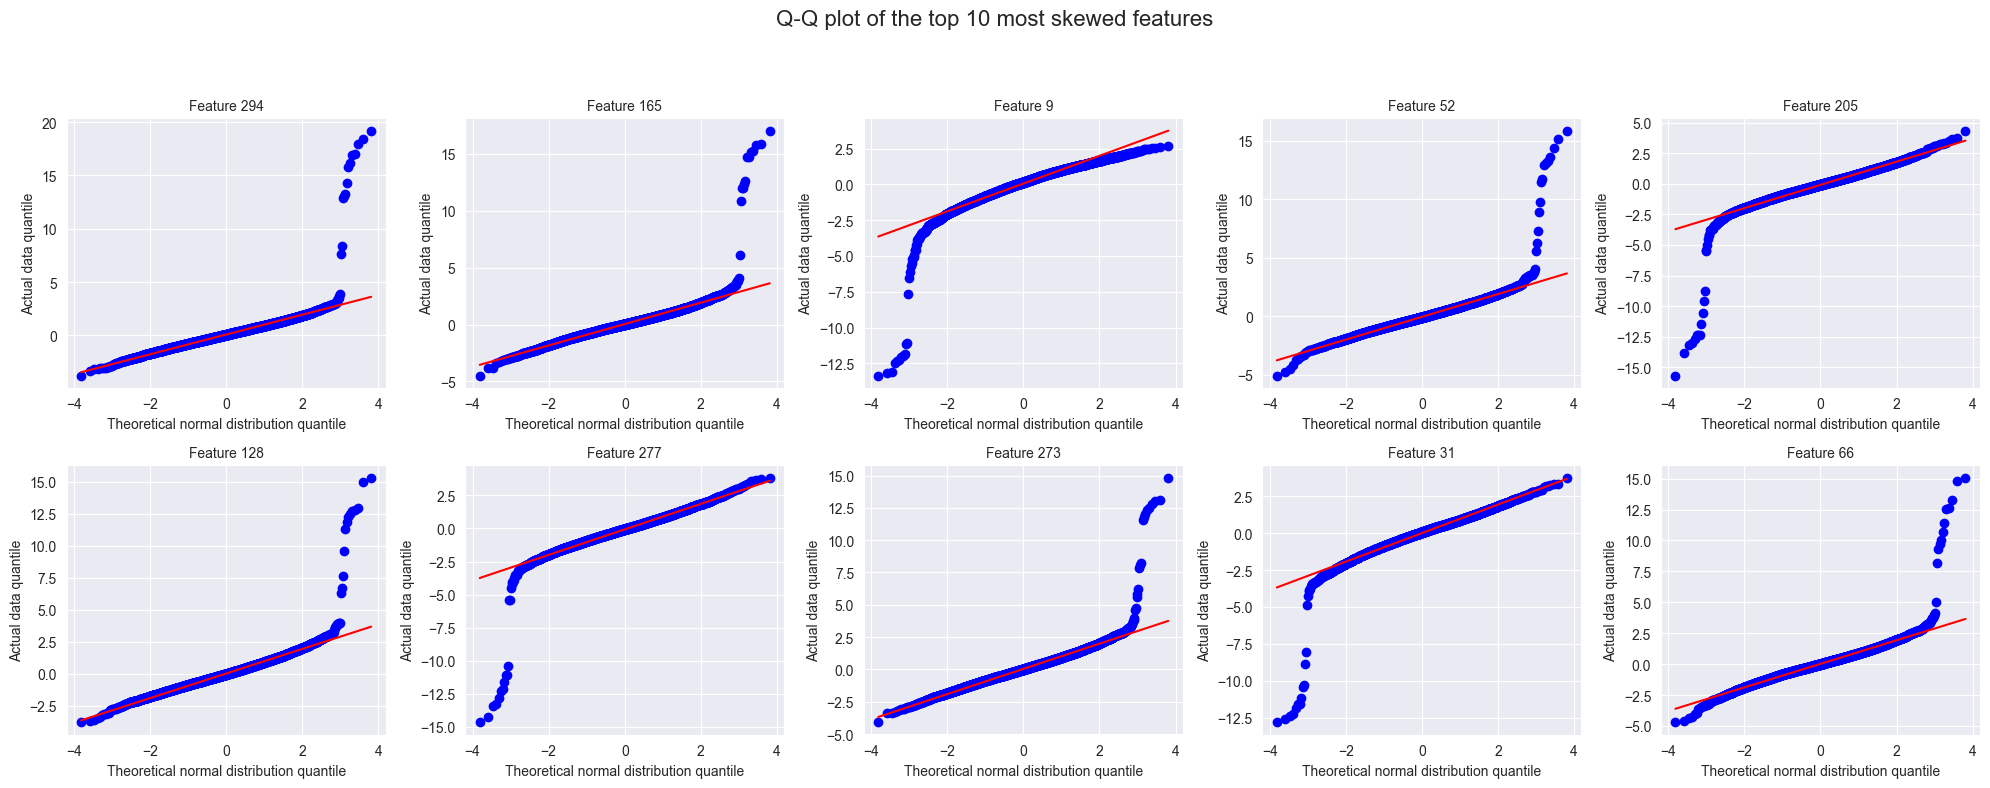

In [37]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(top_skew_features):
    plt.subplot(2, 5, i + 1)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"Feature {col}", fontsize=10)
    plt.xlabel("Theoretical normal distribution quantile")
    plt.ylabel("Actual data quantile")

plt.suptitle("Q-Q plot of the top 10 most skewed features", fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.93))  
plt.show()

In [38]:
# 结论5.2: 尾部向上偏离对角线，是右偏(正偏)

In [39]:
# 5. 特征间的相关性分析

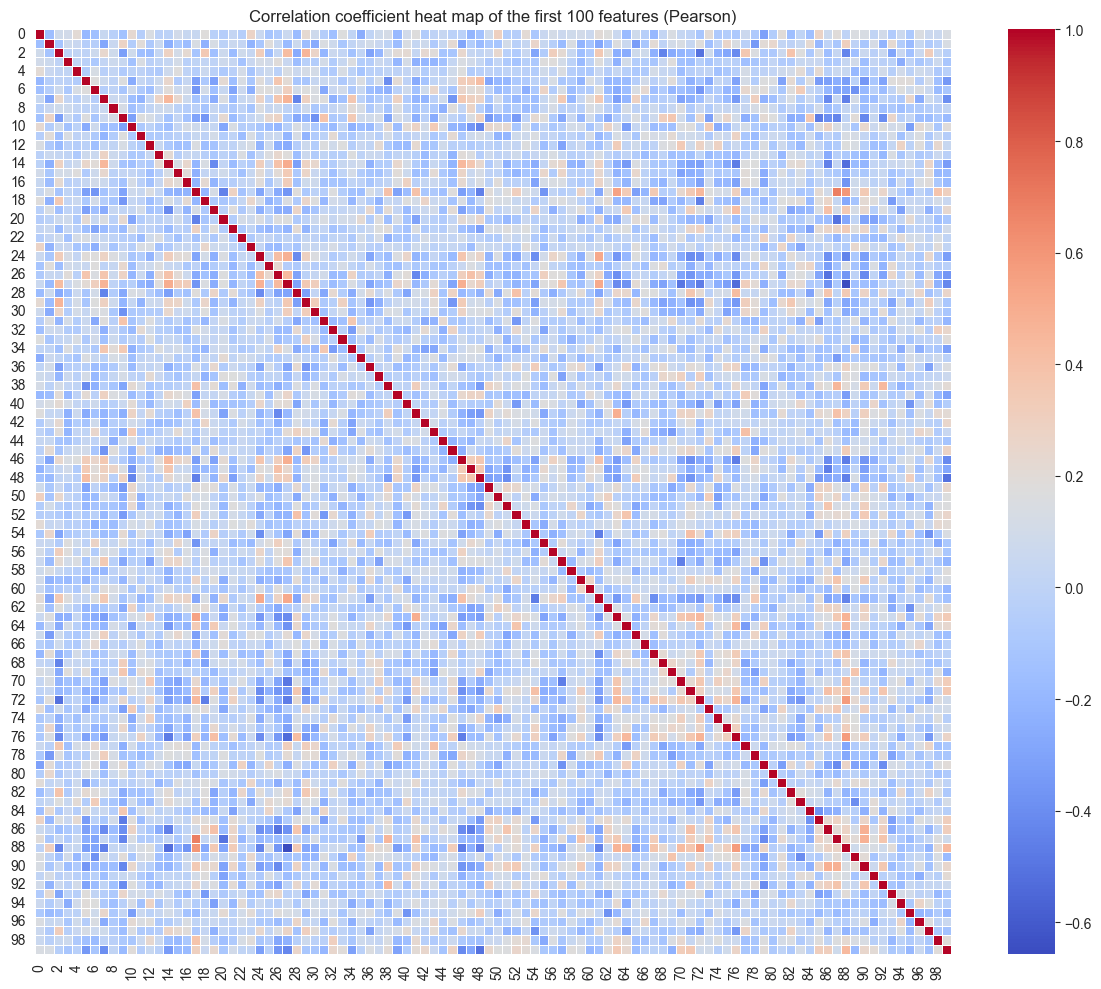

In [40]:
# 计算皮尔逊相关系数矩阵（特征与特征之间）
corr_matrix = X_train.corr()

# 可视化前30个特征的热力图
subset = X_train.iloc[:, :100]
corr_subset = subset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation coefficient heat map of the first 100 features (Pearson)")
plt.tight_layout()
plt.show()

In [41]:
#找出高相关的特征对
threshold = 0.9
s_corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(s_corr_matrix.shape), k=1).astype(bool))

# 找出高于阈值的特征对
high_corr_pairs = [(col, row, s_corr_matrix.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if pd.notnull(upper.loc[row, col]) and upper.loc[row, col] > threshold]

# 显示结果
if len(high_corr_pairs)>0:
    print("高于 0.9 的特征对（可能冗余）:")
    for a, b, c in high_corr_pairs:
        print(f"{a} ↔ {b} → 相关系数: {c:.3f}")
else:
    print("没有强相关的特征对")


没有强相关的特征对


In [42]:
# 结论6:特征之间较为独立，彼此不会线性重复 
# 多重共线性风险较低，线性模型（如 Logistic Regression）更稳定
# 无需手动剔除特征，可以保留全部特征继续建模

In [43]:
#6. PCA（主成分分析）降维与可视化 PCA (Principal Component Analysis) Dimensionality Reduction and Visualization

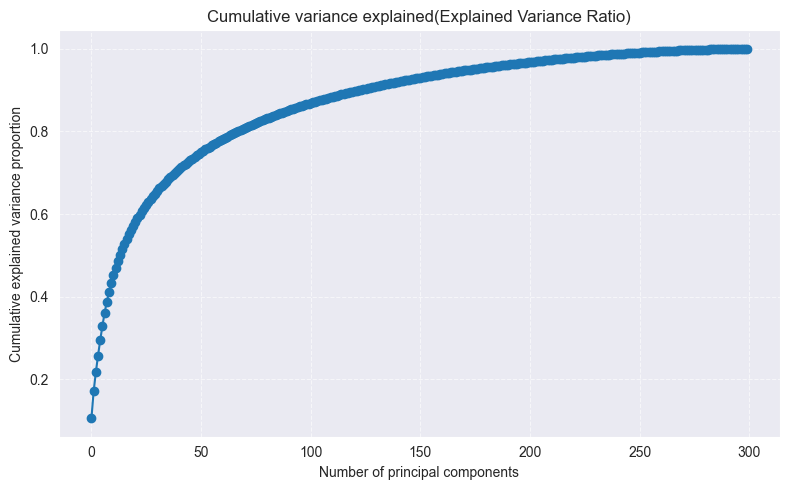

In [44]:
# 拟合 PCA 模型，保留全部 300 个主成分
pca = PCA(n_components=300)
pca.fit(X_train)

# 查看每个主成分解释的方差占比
explained_variance_ratio = pca.explained_variance_ratio_

# 累积贡献率曲线图
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title("Cumulative variance explained(Explained Variance Ratio)")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance proportion")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [45]:
# 结论7: 前两个主成分仅解释 17.07%，说明特征信息非常“高维且均匀”，维度确实对整体意思表达存在重要作用

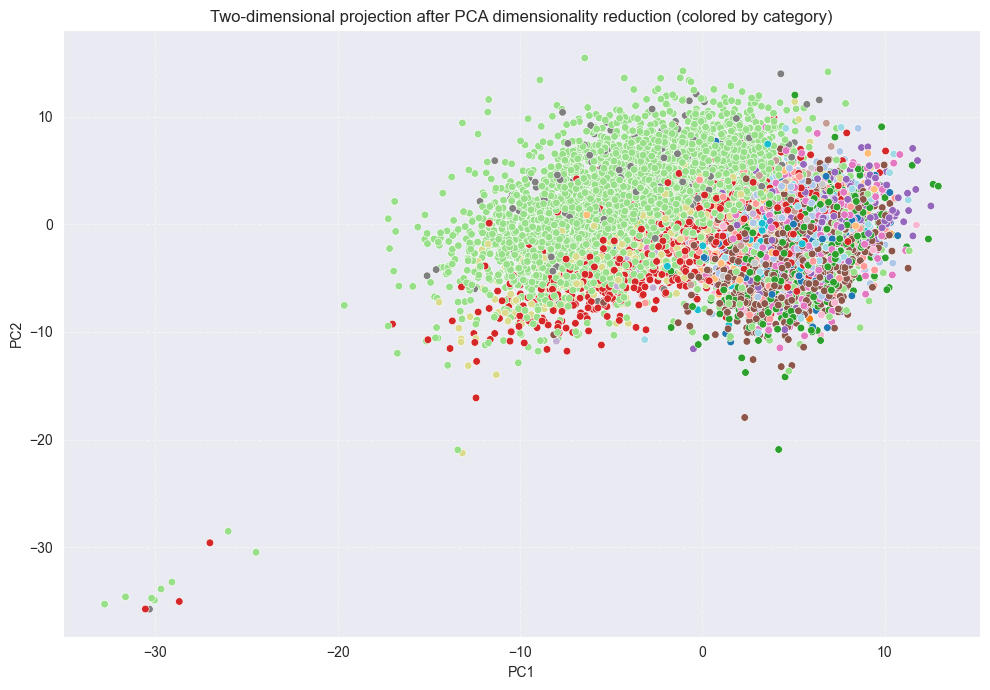

In [46]:
# 用 PCA 将数据降到二维
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train)

# 合并标签
X_pca_df = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
X_pca_df["label"] = y_train["label"]

# 可视化（使用 Seaborn）
plt.figure(figsize=(10, 7))
sns.scatterplot(data=X_pca_df, x="PC1", y="PC2", hue="label", palette="tab20", legend=False, s=30)
plt.title("Two-dimensional projection after PCA dimensionality reduction (colored by category)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [47]:
# ******************************   EDA finished   ******************************

In [48]:
## 2. Feature Selection

In [49]:
# 2.1 T-test method

In [94]:
X_test_1 = pd.read_csv("data/X_test_1.csv")
X_test_2 = pd.read_csv("data/X_test_2.csv")
y_test_2_reduced = pd.read_csv("data/y_test_2_reduced.csv")

/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [23:27:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [23:27:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [23:27:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [23:27:58] WARNING: /Users/runner/work/xgbo

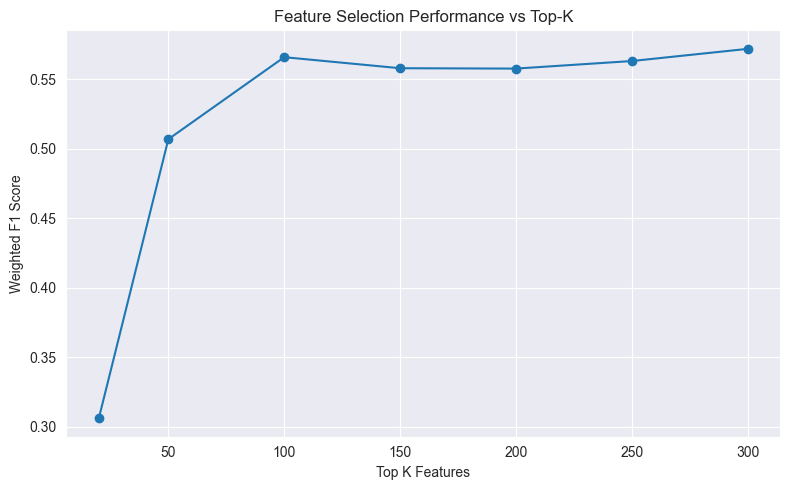

In [105]:
# 截取与 y_test_2 对齐的测试集部分
X_test_for_eval = X_test_2.iloc[:202]
y_test_for_eval = y_test_2_reduced

# 待评估的 top-K 特征数量列表
k_list = [20, 50, 100, 150, 200,250,300]
results = []

# 对每个 k 值进行特征选择 + 模型训练 + 验证
for k in k_list:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_k = selector.fit_transform(X_train, y_train.values.ravel())
    X_test_k = selector.transform(X_test_for_eval)

    model = XGBClassifier(
        objective='multi:softprob',
        num_class=28,
        eval_metric='mlogloss',
        use_label_encoder=False,
        n_estimators=100,
        random_state=42
    )
    model.fit(X_train_k, y_train.values.ravel())
    y_pred = model.predict(X_test_k)

    f1 = f1_score(y_test_for_eval, y_pred, average='weighted')
    results.append((k, f1))

# 可视化性能 vs k
k_vals, f1_vals = zip(*results)
plt.figure(figsize=(8, 5))
plt.plot(k_vals, f1_vals, marker='o')
plt.xlabel("Top K Features")
plt.ylabel("Weighted F1 Score")
plt.title("Feature Selection Performance vs Top-K")
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# 设置选择的特征数量
k = 100  # 可根据需要调整

# 创建特征选择器（f_classif 基于 ANOVA F 检验）
selector = SelectKBest(score_func=f_classif, k=k)

# 拟合特征选择器
selector.fit(X_train, y_train.values.ravel())

# 获取每个特征的 F 检验分数和对应的 p 值
f_scores = selector.scores_
p_values = selector.pvalues_

# 构造包含特征名、F_score 和 p_value 的 DataFrame
feature_scores_df = pd.DataFrame({
    'Feature': X_train.columns,
    'F_score': f_scores,
    'p_value': p_values
})

# 按 F_score 降序排列，选出前 k 个特征
top_features_df = feature_scores_df.sort_values(by='F_score', ascending=False).head(k)
top_features_df.reset_index(drop=True, inplace=True)

# 获取前k个特征的列名
selected_columns = top_features_df['Feature'].tolist()

# 筛选数据集
X_train_selected = X_train[selected_columns]
X_test_1_selected = X_test_1[selected_columns]
X_test_2_selected = X_test_2[selected_columns]

# 打印结果
print("Top", k, "Features by T-test (ANOVA F检验):")
print(top_features_df)

Top 100 Features by T-test (ANOVA F检验):
   Feature     F_score  p_value
0       48  316.406386      0.0
1       17  287.122140      0.0
2      263  276.539340      0.0
3      270  270.317512      0.0
4      172  235.470747      0.0
..     ...         ...      ...
95      21   72.492733      0.0
96      55   71.975390      0.0
97     260   71.484547      0.0
98     215   71.404131      0.0
99     148   70.052601      0.0

[100 rows x 3 columns]


In [ ]:
# 2.2 mean-value method

In [55]:
# # 设定保留的特征数量
k = 100

# 获取标签
y_series = y_train.values.ravel()
class_labels = np.unique(y_series)

# 初始化字典存储每个特征的最大均值差
mean_diffs = {}

for col in X_train.columns:
    # 计算每个类别中该特征的均值
    class_means = [X_train[y_series == label][col].mean() for label in class_labels]
    
    # 计算该特征在不同类别之间的最大均值差
    max_diff = np.max(class_means) - np.min(class_means)
    
    # 存入字典
    mean_diffs[col] = max_diff

# 转为 DataFrame 并排序
mean_diff_df = pd.DataFrame.from_dict(mean_diffs, orient='index', columns=['Mean_Diff'])
mean_diff_df.sort_values(by='Mean_Diff', ascending=False, inplace=True)

# 选出 top-k 特征
top_features_mean = mean_diff_df.head(k).index.tolist()

# 筛选数据集
X_train_mean = X_train[top_features_mean]
X_test_1_mean = X_test_1[top_features_mean]
X_test_2_mean = X_test_2[top_features_mean]

# 打印 top-k 特征及其均值差
print("Top", k, "features by mean difference across classes:")
print(mean_diff_df.head(k))

Top 100 features by mean difference across classes:
     Mean_Diff
131   3.301838
85    2.968426
112   2.851383
182   2.824371
125   2.796024
..         ...
124   2.058709
35    2.047045
291   2.043782
13    2.042232
180   2.041222

[100 rows x 1 columns]


In [ ]:
# 2.3 features_importance_ method

In [56]:
# 初始化 XGBoost 分类器
model = XGBClassifier(
    objective='multi:softprob',
    num_class=28,  
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 拟合模型（基于所有原始特征）
model.fit(X_train, y_train.values.ravel())

# 获取特征重要性
importances = model.feature_importances_
importance_df = pd.Series(importances, index=X_train.columns)

# 选出 top 100 个最重要的特征
top_features_model = importance_df.sort_values(ascending=False).head(100).index.tolist()

# 筛选训练集和测试集
X_train_model = X_train[top_features_model]
X_test_1_model = X_test_1[top_features_model]
X_test_2_model = X_test_2[top_features_model]

# 打印重要性最大的特征及得分
print("Top 100 features by XGBoost feature importance:")
print(importance_df.sort_values(ascending=False).head(100))


/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:08:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Top 100 features by XGBoost feature importance:
48     0.144770
90     0.030023
290    0.020075
231    0.019086
88     0.018642
         ...   
110    0.002493
278    0.002477
144    0.002475
285    0.002446
98     0.002442
Length: 100, dtype: float32


In [57]:
# ******************************   Feature selection finished   ******************************

In [ ]:
# 3. Model training

In [ ]:
# 3.1 Logistic Regression model

In [73]:
# 离群值裁剪函数
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# 三种特征选择结果
feature_sets = {
    "T-test": X_train_selected,
    "Mean-Diff": X_train_mean,
    "Model-Importance": X_train_model
}

results_logreg = []

for name, X in feature_sets.items():
    print(f"\n[Logistic Regression] Feature Selection: {name}")

    # 预处理
    X_cleaned = winsorize_iqr(X)
    X_scaled = RobustScaler().fit_transform(X_cleaned)
    X_subtrain, X_val, y_subtrain, y_val = train_test_split(
        X_scaled, y_train, test_size=0.2, stratify=y_train, random_state=42
    )
    smote = SMOTE(random_state=42, k_neighbors=3)
    X_subtrain_res, y_subtrain_res = smote.fit_resample(X_subtrain, y_subtrain)

    # 模型训练
    model = LogisticRegression(
        solver='lbfgs',
        multi_class='multinomial',
        max_iter=1000,
        random_state=42
    )
    model.fit(X_subtrain_res, y_subtrain_res.values.ravel())

    # 验证预测
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)

    results_logreg.append({
        "Feature Selection": name,
        "F1_macro": round(f1_score(y_val, y_val_pred, average='macro', zero_division=0), 4),
        "F1_weighted": round(f1_score(y_val, y_val_pred, average='weighted', zero_division=0), 4),
        "Log_loss": round(log_loss(y_val, y_val_proba), 4)
    })

# 输出结果
df_logreg = pd.DataFrame(results_logreg)
print("\n=== Logistic Regression Results ===")
print(df_logreg)


[Logistic Regression] Feature Selection: T-test


/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[Logistic Regression] Feature Selection: Mean-Diff


/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[Logistic Regression] Feature Selection: Model-Importance


/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression Results ===
  Feature Selection  F1_macro  F1_weighted  Log_loss
0            T-test    0.4044       0.6481    1.6904
1         Mean-Diff    0.4230       0.6528    1.7585
2  Model-Importance    0.4100       0.6669    1.7229


/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Log Loss: 1.6904

=== Classification Report (Logistic Regression, T-test Features) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.16      0.38      0.23        13
           4       0.38      0.48      0.42        48
           5       0.94      0.67      0.78       896
           6       0.88      0.76      0.81       111
           7       0.38      0.67      0.48        21
           8       0.74      0.57      0.64       103
           9       0.00      0.00      0.00         5
          10       0.83      0.58      0.68       216
          11       0.57      0.50      0.53        16
          12       0.59      0.35      0.44        91
          13       0.03      0.08      0.05        12
          14       0.10      0.49      0.16        53
          15       0.50      1.00      0.67    

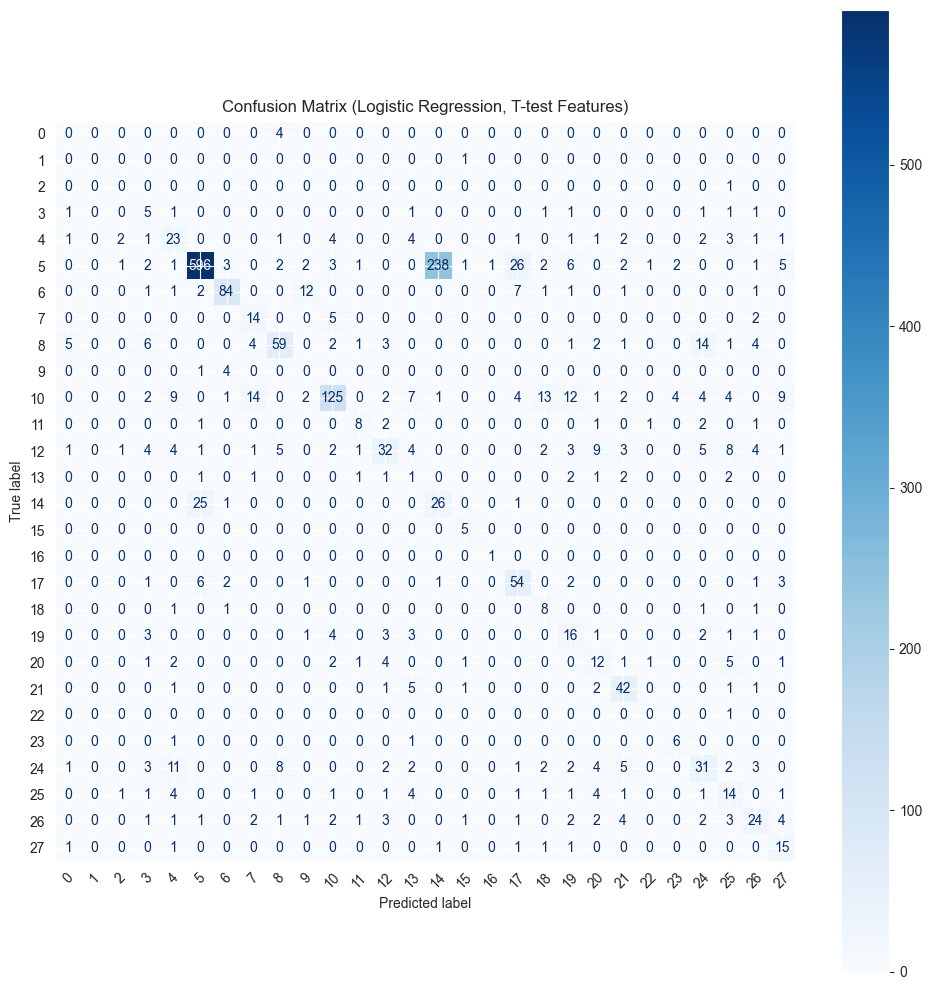

In [78]:

# === Step 1: 离群值裁剪函数 ===
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# === Step 2: 数据预处理 ===
def preprocess(X, y, test_size=0.2, random_state=42, k_neighbors=3):
    X_clean = winsorize_iqr(X)
    X_scaled = RobustScaler().fit_transform(X_clean)
    X_train, X_val, y_train_, y_val_ = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=random_state
    )
    smote = SMOTE(random_state=random_state, k_neighbors=k_neighbors)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train_)
    return X_train_res, y_train_res, X_val, y_val_

# === Step 3: 数据准备（T-test 特征） ===
X_train_input = X_train_selected
X_train_res, y_train_res, X_val, y_val = preprocess(X_train_input, y_train)

# === Step 4: 模型训练（Logistic Regression）===
model = LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1000,
    random_state=42
)
model.fit(X_train_res, y_train_res.values.ravel())

# === Step 5: 模型评估 ===
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)

# Log Loss
loss = log_loss(y_val, y_val_proba)
print(f"\nLog Loss: {round(loss, 4)}")

# 分类报告
print("\n=== Classification Report (Logistic Regression, T-test Features) ===")
print(classification_report(y_val, y_val_pred, zero_division=0))

# F1 和准确率
f1_macro = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
f1_weighted = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)
acc = accuracy_score(y_val, y_val_pred)

print(f"Final F1 Score (macro):    {round(f1_macro, 4)}")
print(f"Final F1 Score (weighted): {round(f1_weighted, 4)}")
print(f"Final Accuracy:            {round(acc, 4)}")

# === Step 6: 混淆矩阵绘制 ===
cm = confusion_matrix(y_val, y_val_pred, labels=range(28))
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix (Logistic Regression, T-test Features)")
plt.tight_layout()

In [ ]:
# 3.2 Random Forest model

In [72]:
results_rf = []

for name, X in feature_sets.items():
    print(f"\n[Random Forest] Feature Selection: {name}")

    # 预处理
    X_cleaned = winsorize_iqr(X)
    X_scaled = RobustScaler().fit_transform(X_cleaned)
    X_subtrain, X_val, y_subtrain, y_val = train_test_split(
        X_scaled, y_train, test_size=0.2, stratify=y_train, random_state=42
    )
    smote = SMOTE(random_state=42, k_neighbors=3)
    X_subtrain_res, y_subtrain_res = smote.fit_resample(X_subtrain, y_subtrain)

    # 模型训练
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_subtrain_res, y_subtrain_res.values.ravel())

    # 验证预测
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)

    results_rf.append({
        "Feature Selection": name,
        "F1_macro": round(f1_score(y_val, y_val_pred, average='macro', zero_division=0), 4),
        "F1_weighted": round(f1_score(y_val, y_val_pred, average='weighted', zero_division=0), 4),
        "Log_loss": round(log_loss(y_val, y_val_proba), 4)
    })

# 输出结果
df_rf = pd.DataFrame(results_rf)
print("\n=== Random Forest Results ===")
print(df_rf)


[Random Forest] Feature Selection: T-test

[Random Forest] Feature Selection: Mean-Diff

[Random Forest] Feature Selection: Model-Importance

=== Random Forest Results ===
  Feature Selection  F1_macro  F1_weighted  Log_loss
0            T-test    0.3753       0.7170    1.3362
1         Mean-Diff    0.4156       0.7095    1.4039
2  Model-Importance    0.3750       0.7134    1.2051



Log Loss: 1.3362

=== Classification Report (Random Forest, T-test Features) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.20      0.08      0.11        13
           4       0.44      0.46      0.45        48
           5       0.88      0.95      0.91       896
           6       0.88      0.95      0.91       111
           7       0.78      0.33      0.47        21
           8       0.63      0.77      0.69       103
           9       0.00      0.00      0.00         5
          10       0.68      0.87      0.76       216
          11       0.60      0.56      0.58        16
          12       0.40      0.53      0.45        91
          13       0.00      0.00      0.00        12
          14       0.10      0.04      0.05        53
          15       1.00      0.20      0.33         5

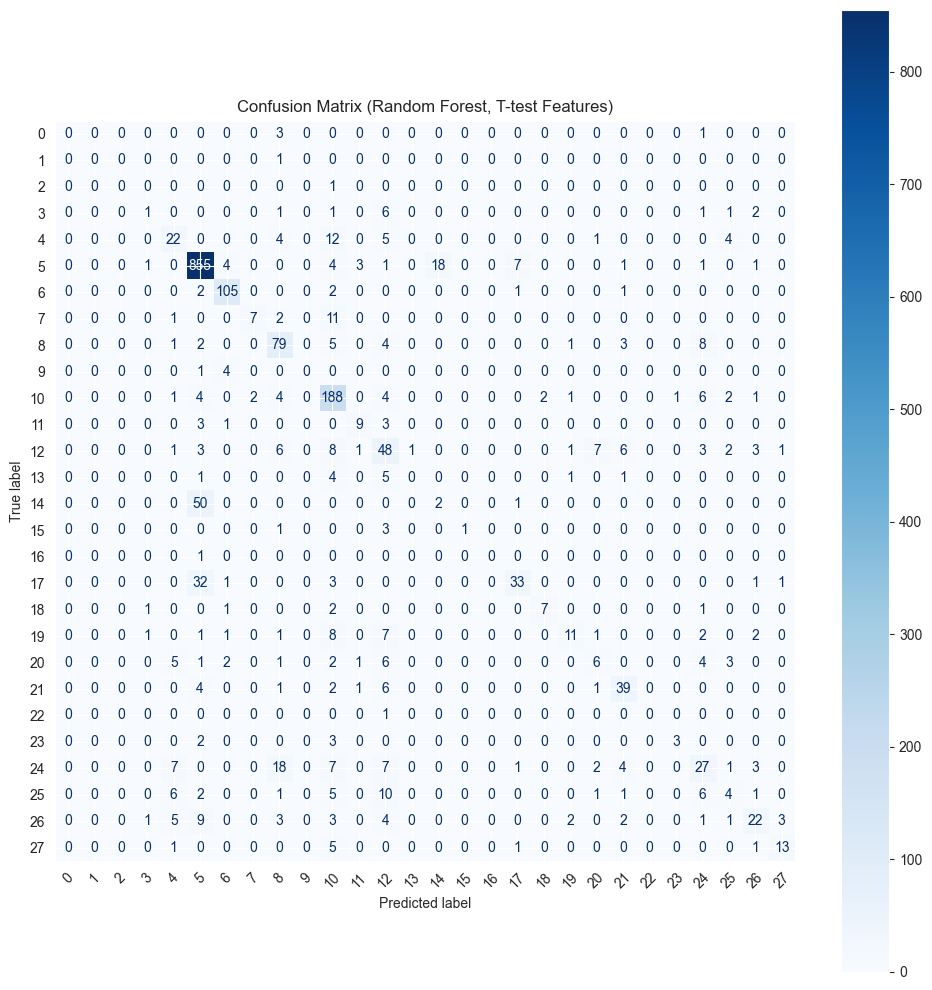

In [77]:
# === Step 1: 离群值裁剪函数 ===
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# === Step 2: 数据预处理 ===
def preprocess(X, y, test_size=0.2, random_state=42, k_neighbors=3):
    X_clean = winsorize_iqr(X)
    X_scaled = RobustScaler().fit_transform(X_clean)
    X_train, X_val, y_train_, y_val_ = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=random_state
    )
    smote = SMOTE(random_state=random_state, k_neighbors=k_neighbors)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train_)
    return X_train_res, y_train_res, X_val, y_val_

# === Step 3: 数据准备（T-test 特征） ===
X_train_input = X_train_selected  # 已从 T-test 特征选择生成
X_train_res, y_train_res, X_val, y_val = preprocess(X_train_input, y_train)

# === Step 4: 训练 Random Forest 模型 ===
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # 并行加速
)
model.fit(X_train_res, y_train_res.values.ravel())

# === Step 5: 模型评估 ===
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)

# Log Loss
loss = log_loss(y_val, y_val_proba)
print(f"\nLog Loss: {round(loss, 4)}")

# 分类报告
print("\n=== Classification Report (Random Forest, T-test Features) ===")
print(classification_report(y_val, y_val_pred, zero_division=0))

# F1 和准确率
f1_macro = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
f1_weighted = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)
acc = accuracy_score(y_val, y_val_pred)

print(f"Final F1 Score (macro):    {round(f1_macro, 4)}")
print(f"Final F1 Score (weighted): {round(f1_weighted, 4)}")
print(f"Final Accuracy:            {round(acc, 4)}")

# === Step 6: 混淆矩阵绘制 ===
cm = confusion_matrix(y_val, y_val_pred, labels=range(28))
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix (Random Forest, T-test Features)")
plt.tight_layout()
plt.show()

In [ ]:
# 3.3 XGBoost model

In [71]:
# IQR离群值裁剪函数（不删除样本，只截断极端值）
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# 三种特征选择后的数据
feature_sets = {
    "T-test": X_train_selected,
    "Mean-Diff": X_train_mean,
    "Model-Importance": X_train_model
}

# 改为列表
results_xgb = []

for name, X in feature_sets.items():
    print(f"\nRunning XGBoost with features from: {name}")

    # Step 1: 离群值裁剪
    X_cleaned = winsorize_iqr(X)

    # Step 2: Robust 标准化
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X_cleaned)

    # Step 3: 划分训练/验证集
    X_subtrain, X_val, y_subtrain, y_val = train_test_split(
        X_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

    # Step 4: SMOTE
    smote = SMOTE(random_state=42, k_neighbors=3)
    X_subtrain_res, y_subtrain_res = smote.fit_resample(X_subtrain, y_subtrain)

    # Step 5: 模型训练
    model = XGBClassifier(
        objective='multi:softprob',
        num_class=28,
        eval_metric='mlogloss',
        use_label_encoder=False,
        n_estimators=100,
        random_state=42
    )
    model.fit(X_subtrain_res, y_subtrain_res.values.ravel())

    # Step 6: 预测与指标
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)

    # Step 7: 记录结果
    results_xgb.append({
        "Feature Selection": name,
        "F1_macro": round(f1_score(y_val, y_val_pred, average='macro', zero_division=0), 4),
        "F1_weighted": round(f1_score(y_val, y_val_pred, average='weighted', zero_division=0), 4),
        "Log_loss": round(log_loss(y_val, y_val_proba), 4)
    })

# Step 8: 输出结果表格（无需 .T）
results_df = pd.DataFrame(results_xgb)
print("\n=== Comparison Results (XGBoost + 3 Feature Selection Methods) ===")
print(results_df)


Running XGBoost with features from: T-test


/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:56:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Running XGBoost with features from: Mean-Diff


/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:57:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Running XGBoost with features from: Model-Importance


/Users/houyijia/Desktop/COMP9021_23T3/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:57:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Comparison Results (XGBoost + 3 Feature Selection Methods) ===
  Feature Selection  F1_macro  F1_weighted  Log_loss
0            T-test    0.4562       0.7304    1.1203
1         Mean-Diff    0.4073       0.7117    1.1653
2  Model-Importance    0.4157       0.7272    1.1016


In [111]:
# === Step 1: 离群值裁剪函数 ===
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# === Step 2: 数据预处理 ===
def preprocess(X, y, test_size=0.2, random_state=42, k_neighbors=3):
    X_clean = winsorize_iqr(X)
    X_scaled = RobustScaler().fit_transform(X_clean)
    X_train, X_val, y_train_, y_val_ = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=random_state
    )
    smote = SMOTE(random_state=random_state, k_neighbors=k_neighbors)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train_)
    return X_train_res, y_train_res, X_val, y_val_

# === Step 3: 数据准备（T-test 特征） ===
X_train_input = X_train_selected
X_train_res, y_train_res, X_val, y_val = preprocess(X_train_input, y_train)

# === Step 4: 模型初始化 ===
model = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    n_estimators=100,
    random_state=42
)

# === Step 5: 每轮 log_loss 跟踪 ===
evals_result = {'log_loss': []}

for i in range(1, model.n_estimators + 1):
    model.n_estimators = i
    model.fit(X_train_res, y_train_res.values.ravel(), verbose=False)
    y_val_proba = model.predict_proba(X_val)
    loss = log_loss(y_val, y_val_proba)
    evals_result['log_loss'].append(loss)

# === Step 6: 绘制 log_loss 曲线 ===
plt.figure(figsize=(10, 6))
plt.plot(evals_result['log_loss'], label='Validation Log Loss')
plt.xlabel("Boosting Round")
plt.ylabel("Log Loss")
plt.title("Validation Log Loss per Boosting Round")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Step 7: 最终评估 ===
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)

# Log-loss
final_loss = log_loss(y_val, y_val_proba)
print(f"\nLog Loss: {round(final_loss, 4)}")

# 分类报告
print("\n=== Classification Report (Final XGBoost Model, T-test Features) ===")
print(classification_report(y_val, y_val_pred, zero_division=0))

# F1 和准确率
f1_macro = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
f1_weighted = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)
acc = accuracy_score(y_val, y_val_pred)

print(f"Final F1 Score (macro):    {round(f1_macro, 4)}")
print(f"Final F1 Score (weighted): {round(f1_weighted, 4)}")
print(f"Final Accuracy:            {round(acc, 4)}")

# 混淆矩阵
cm = confusion_matrix(y_val, y_val_pred, labels=range(28))
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix (Final XGBoost Model, T-test Features)")
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
# ******************************   Model training finished   ******************************

In [ ]:
## 4. Distribution Shift

In [ ]:
# 4.1 Covariate Shift

X_train 和 X_test_1 的 300 个特征中，其中 113 个特征（约 37.67%）发生了协变量偏移。


,Feature,KS_statistic,p_value,KL_divergence,Shift_flag
48,48,0.0691,0.000325,0.108640,True
125,125,0.0688,0.000350,0.056756,False
253,253,0.0679,0.000438,0.068163,False
270,270,0.0664,0.000633,0.071281,True
90,90,0.0656,0.000768,0.056961,False


X_train 和 X_test_2 的 300 个特征中，其中 150 个特征（约 50.00%）发生了协变量偏移。


,Feature,KS_statistic,p_value,KL_divergence,Shift_flag
90,90,0.297888,2.497427e-132,0.283712,True
249,249,0.290921,3.967352e-126,0.269756,True
141,141,0.274818,2.143881e-112,0.234486,True
86,86,0.272148,3.373654e-110,0.307346,True
111,111,0.263647,2.348210e-103,0.250430,True


/var/folders/mr/_hndpm6s6gl5gd81g24kklm00000gn/T/ipykernel_2486/2016523870.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name], label="Train", shade=True)
/var/folders/mr/_hndpm6s6gl5gd81g24kklm00000gn/T/ipykernel_2486/2016523870.py:54: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[feature_name], label="Test", shade=True)


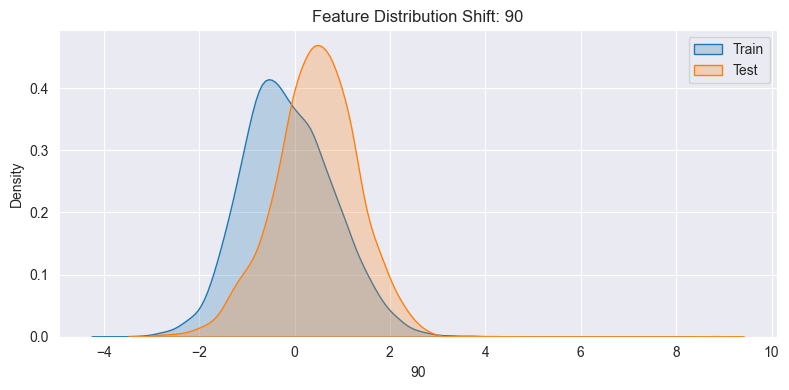

In [115]:
# === KS + KL 检验函数 ===
def check_covariate_shift_ks_kl(X_train, X_test, alpha=0.05, kl_threshold=0.07, ks_threshold=0.1):
    ks_results = []

    for col in X_train.columns:
        # KS检验
        stat, p_value = ks_2samp(X_train[col], X_test[col])

        # KL散度：构建直方图估计概率密度
        train_hist, bins = np.histogram(X_train[col], bins=50, range=(X_train[col].min(), X_train[col].max()), density=True)
        test_hist, _ = np.histogram(X_test[col], bins=bins, density=True)

        # 平滑处理避免除0
        train_hist += 1e-8
        test_hist += 1e-8

        kl_div = entropy(train_hist, test_hist)

        # 是否检测到协变量漂移（组合判断）
        shift_flag = (stat > ks_threshold and p_value < alpha) or (kl_div > kl_threshold)

        ks_results.append({
            "Feature": col,
            "KS_statistic": stat,
            "p_value": p_value,
            "KL_divergence": kl_div,
            "Shift_flag": shift_flag
        })

    return pd.DataFrame(ks_results).sort_values("KS_statistic", ascending=False)

# === 应用在 X_test_1 ===
result_df_1 = check_covariate_shift_ks_kl(X_train, X_test_1)
n_total_1 = len(result_df_1)
n_shift_1 = result_df_1['Shift_flag'].sum()
shift_ratio_1 = n_shift_1 / n_total_1

print(f"X_train 和 X_test_1 的 {n_total_1} 个特征中，其中 {n_shift_1} 个特征（约 {shift_ratio_1:.2%}）发生了协变量偏移。")
display(result_df_1.head())

# === 应用在 X_test_2 ===
result_df_2 = check_covariate_shift_ks_kl(X_train, X_test_2)
n_total_2 = len(result_df_2)
n_shift_2 = result_df_2['Shift_flag'].sum()
shift_ratio_2 = n_shift_2 / n_total_2

print(f"X_train 和 X_test_2 的 {n_total_2} 个特征中，其中 {n_shift_2} 个特征（约 {shift_ratio_2:.2%}）发生了协变量偏移。")
display(result_df_2.head())

# === 可视化函数 ===
def plot_feature_shift(X_train, X_test, feature_name):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(X_train[feature_name], label="Train", shade=True)
    sns.kdeplot(X_test[feature_name], label="Test", shade=True)
    plt.title(f"Feature Distribution Shift: {feature_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 示例：可视化第90列的分布变化
plot_feature_shift(X_train, X_test_2, '90')

    Feature  KS_statistic   p_value  shift_detected
48       48        0.0691  0.000325            True
125     125        0.0688  0.000350            True
253     253        0.0679  0.000438            True
270     270        0.0664  0.000633            True
90       90        0.0656  0.000768            True
..      ...           ...       ...             ...
163     163        0.0169  0.954319           False
137     137        0.0153  0.981787           False
109     109        0.0151  0.984123           False
59       59        0.0142  0.992077           False
202     202        0.0142  0.992077           False

[300 rows x 4 columns]
X_train 和 X_test_1 的 300 个特征中，其中 63 个特征（约 21.00%）在训练集与测试集之间发生了显著分布偏移（p < 0.05），存在协变量偏移的风险。
    Feature  KS_statistic        p_value  shift_detected
90       90      0.297888  2.497427e-132            True
249     249      0.290921  3.967352e-126            True
141     141      0.274818  2.143881e-112            True
86       86      0.272148  3.3736

/var/folders/mr/_hndpm6s6gl5gd81g24kklm00000gn/T/ipykernel_2486/1182913585.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[feature_name], label="Train", shade=True)
/var/folders/mr/_hndpm6s6gl5gd81g24kklm00000gn/T/ipykernel_2486/1182913585.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[feature_name], label="Test", shade=True)


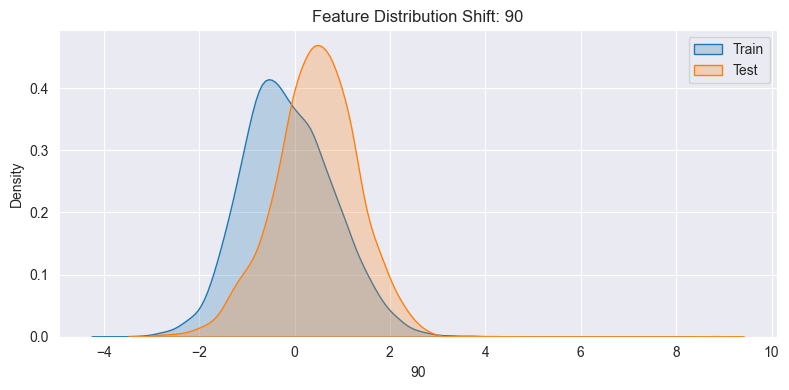

In [100]:
# 逐列执行 KS 检验
def check_covariate_shift_ks(X_train, X_test, alpha=0.05):
    ks_results = []

    for col in X_train.columns:
        stat, p = ks_2samp(X_train[col], X_test[col])
        ks_results.append({
            "Feature": col,
            "KS_statistic": stat,
            "p_value": p,
            "shift_detected": p < alpha
        })

    return pd.DataFrame(ks_results).sort_values("KS_statistic", ascending=False)

result_df = check_covariate_shift_ks(X_train, X_test_1)
print(result_df)
n_total = len(result_df)
n_shift = result_df['shift_detected'].sum()
shift_ratio = n_shift / n_total

print(f"X_train 和 X_test_1 的 {n_total} 个特征中，其中 {n_shift} 个特征（约 {shift_ratio:.2%}）在训练集与测试集之间发生了显著分布偏移（p < 0.05），存在协变量偏移的风险。")

result_df_2 = check_covariate_shift_ks(X_train, X_test_2)
print(result_df_2)
n_total_2 = len(result_df_2)
n_shift_2 = result_df_2['shift_detected'].sum()
shift_ratio_2 = n_shift_2 / n_total_2

print(f"X_train 和 X_test_1 的 {n_total_2} 个特征中，其中 {n_shift_2} 个特征（约 {shift_ratio_2:.2%}）在训练集与测试集之间发生了显著分布偏移（p < 0.05），存在协变量偏移的风险。")

def plot_feature_shift(X_train, X_test, feature_name):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(X_train[feature_name], label="Train", shade=True)
    sns.kdeplot(X_test[feature_name], label="Test", shade=True)
    plt.title(f"Feature Distribution Shift: {feature_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_feature_shift(X_train, X_test_2, '90')

In [ ]:
# 4.2 Label Shift


=== Label Shift Analysis ===
       Train_P(Y)  Test_P(Y)     Shift
Label                                 
0          0.0018   0.000000  0.001800
1          0.0007   0.000000  0.000700
2          0.0007   0.004950  0.004250
3          0.0065   0.004950  0.001550
4          0.0238   0.019802  0.003998
5          0.4479   0.044554  0.403346
6          0.0553   0.014851  0.040449
7          0.0103   0.069307  0.059007
8          0.0516   0.143564  0.091964
9          0.0025   0.014851  0.012351
10         0.1081   0.009901  0.098199
11         0.0078   0.044554  0.036754
12         0.0457   0.212871  0.167171
13         0.0062   0.004950  0.001250
14         0.0264   0.029703  0.003303
15         0.0026   0.004950  0.002350
16         0.0006   0.000000  0.000600
17         0.0354   0.049505  0.014105
18         0.0060   0.004950  0.001050
19         0.0177   0.019802  0.002102
20         0.0153   0.014851  0.000449
21         0.0269   0.034653  0.007753
22         0.0007   0.000000  0.00

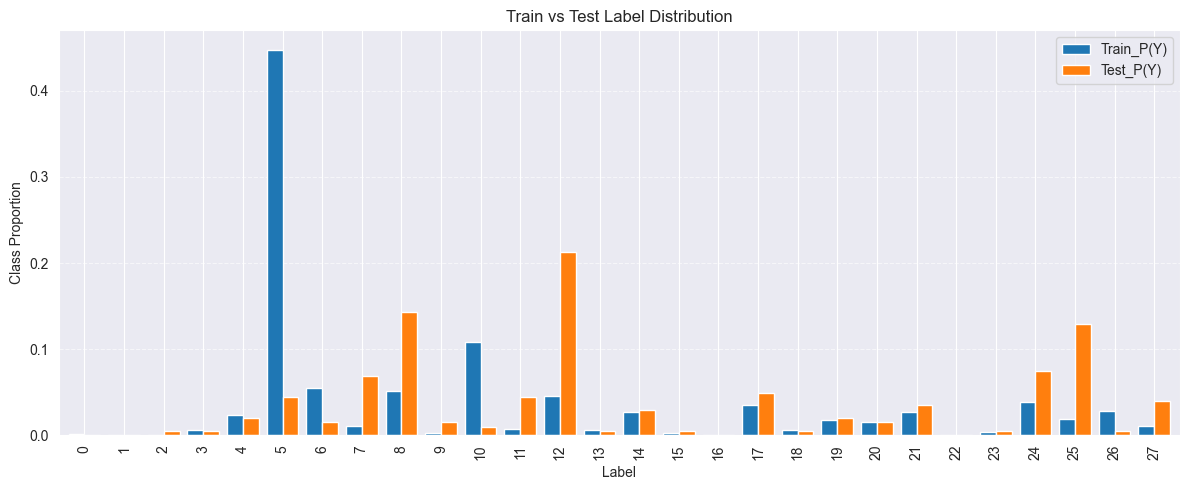

,Label,Train_P(Y),Test_P(Y),Shift
0,0,0.0018,0.000000,0.001800
1,1,0.0007,0.000000,0.000700
2,2,0.0007,0.004950,0.004250
3,3,0.0065,0.004950,0.001550
4,4,0.0238,0.019802,0.003998
5,5,0.4479,0.044554,0.403346
6,6,0.0553,0.014851,0.040449
7,7,0.0103,0.069307,0.059007
8,8,0.0516,0.143564,0.091964
9,9,0.0025,0.014851,0.012351


In [117]:
def check_label_shift(y_train, y_test):
    # 保证是 Series 类型
    if isinstance(y_train, pd.DataFrame):
        y_train = y_train.iloc[:, 0]
    if isinstance(y_test, pd.DataFrame):
        y_test = y_test.iloc[:, 0]

    # 标签全集
    all_labels = sorted(set(y_train.unique()) | set(y_test.unique()))

    # 归一化频率
    y_train_counts = y_train.value_counts(normalize=True).sort_index()
    y_test_counts = y_test.value_counts(normalize=True).sort_index()

    # 构建概率向量（对所有标签补齐）
    train_probs = np.array([y_train_counts.get(i, 0) for i in all_labels])
    test_probs = np.array([y_test_counts.get(i, 0) for i in all_labels])

    label_df = pd.DataFrame({
        "Label": all_labels,
        "Train_P(Y)": train_probs,
        "Test_P(Y)": test_probs
    })

    # 平均偏移
    label_df["Shift"] = abs(label_df["Train_P(Y)"] - label_df["Test_P(Y)"])
    avg_shift = label_df["Shift"].mean()

    # KL 散度（加平滑避免除0）
    train_probs_smooth = train_probs + 1e-8
    test_probs_smooth = test_probs + 1e-8
    kl_div = entropy(test_probs_smooth, train_probs_smooth)

    # 打印结果
    print("\n=== Label Shift Analysis ===")
    print(label_df.set_index("Label"))

    print(f"\n平均标签偏移程度: {avg_shift:.2%}")
    print(f"KL 散度（KL Divergence）: {kl_div:.4f}")

    # 可视化
    label_df.set_index("Label")[["Train_P(Y)", "Test_P(Y)"]].plot.bar(figsize=(12, 5), width=0.8)
    plt.title("Train vs Test Label Distribution")
    plt.ylabel("Class Proportion")
    plt.xlabel("Label")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return label_df

check_label_shift(y_train, y_test_2_reduced)


=== Label Shift Analysis ===
       Train_P(Y)  Test_P(Y)     Shift
label                                 
0          0.0018   0.000000  0.001800
1          0.0007   0.000000  0.000700
2          0.0007   0.004950  0.004250
3          0.0065   0.004950  0.001550
4          0.0238   0.019802  0.003998
5          0.4479   0.044554  0.403346
6          0.0553   0.014851  0.040449
7          0.0103   0.069307  0.059007
8          0.0516   0.143564  0.091964
9          0.0025   0.014851  0.012351
10         0.1081   0.009901  0.098199
11         0.0078   0.044554  0.036754
12         0.0457   0.212871  0.167171
13         0.0062   0.004950  0.001250
14         0.0264   0.029703  0.003303
15         0.0026   0.004950  0.002350
16         0.0006   0.000000  0.000600
17         0.0354   0.049505  0.014105
18         0.0060   0.004950  0.001050
19         0.0177   0.019802  0.002102
20         0.0153   0.014851  0.000449
21         0.0269   0.034653  0.007753
22         0.0007   0.000000  0.00

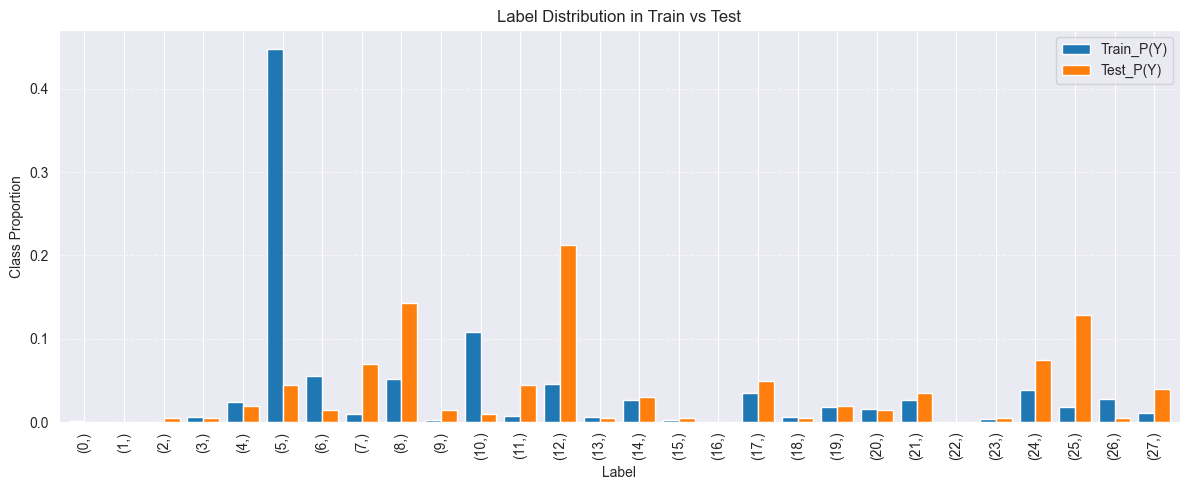

,Train_P(Y),Test_P(Y),Shift
label,,,
0,0.0018,0.000000,0.001800
1,0.0007,0.000000,0.000700
2,0.0007,0.004950,0.004250
3,0.0065,0.004950,0.001550
4,0.0238,0.019802,0.003998
5,0.4479,0.044554,0.403346
6,0.0553,0.014851,0.040449
7,0.0103,0.069307,0.059007
8,0.0516,0.143564,0.091964


In [95]:
def check_label_shift(y_train, y_test):
    y_train_counts = y_train.value_counts(normalize=True).sort_index()
    y_test_counts = y_test.value_counts(normalize=True).sort_index()

    label_df = pd.DataFrame({
        "Train_P(Y)": y_train_counts,
        "Test_P(Y)": y_test_counts
    }).fillna(0)

    label_df["Shift"] = abs(label_df["Train_P(Y)"] - label_df["Test_P(Y)"])

    print("\n=== Label Shift Analysis ===")
    print(label_df)

    avg_shift = label_df["Shift"].mean()
    print(f"\n平均标签偏移程度: {avg_shift:.2%}")

    # 可视化
    label_df[["Train_P(Y)", "Test_P(Y)"]].plot.bar(figsize=(12, 5), width=0.8)
    plt.title("Label Distribution in Train vs Test")
    plt.ylabel("Class Proportion")
    plt.xlabel("Label")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return label_df

check_label_shift(y_train, y_test_2_reduced)

In [ ]:
# 4.3 Concept Shift

In [97]:
# === Step 2: 对齐样本数（避免 y_test 样本不足报错）===
X_test_aligned = X_test_2.iloc[:len(y_test_2_reduced), :]

# === Step 3: 定义概念漂移检测函数 ===
def detect_concept_drift_rf(X_train, y_train, X_test, y_test, random_state=42):
    # 划分训练集内部验证集
    X_subtrain, X_val, y_subtrain, y_val = train_test_split(
        X_train, y_train, test_size=0.2, stratify=y_train, random_state=random_state
    )

    # 训练模型
    model = RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1)
    model.fit(X_subtrain, y_subtrain.values.ravel())

    # 验证集评估
    y_val_pred = model.predict(X_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)

    # 测试集评估
    y_test_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # 打印结果
    print("\n=== Concept Drift Detection Result ===")
    print(f"Validation Accuracy (Train Subset): {acc_val:.4f}")
    print(f"Test Accuracy:                     {acc_test:.4f}")
    print(f"Validation F1 (weighted):          {f1_val:.4f}")
    print(f"Test F1 (weighted):                {f1_test:.4f}")
    print(f"\nAccuracy Drop: {acc_val - acc_test:.4f}")
    print(f"F1 Score Drop:  {f1_val - f1_test:.4f}")

    if (f1_val - f1_test) > 0.05:
        print("检测到概念漂移：P(Y|X) 发生变化，模型泛化能力下降")
    else:
        print("未检测到显著概念漂移，模型较为稳定")

# === Step 4: 执行概念漂移检测 ===
detect_concept_drift_rf(X_train, y_train, X_test_aligned, y_test_2_reduced)


=== Concept Drift Detection Result ===
Validation Accuracy (Train Subset): 0.6970
Test Accuracy:                     0.3911
Validation F1 (weighted):          0.6293
Test F1 (weighted):                0.3807

Accuracy Drop: 0.3059
F1 Score Drop:  0.2486
检测到概念漂移：P(Y|X) 发生变化，模型泛化能力下降


In [ ]:
# 4.4 Solution

In [ ]:
# 处理三种偏移


=== Classification Report (Final Drift-Handled Model on Test Set B) ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         2
           7       0.50      0.20      0.29         5
           8       0.76      0.89      0.82        18
           9       0.33      0.33      0.33         3
          10       0.00      0.00      0.00         0
          11       0.80      1.00      0.89         4
          12       0.75      0.55      0.63        22
          13       0.00      0.00      0.00         0
          14       0.50      1.00      0.67         3
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         0
          17       0.57      0.67      0.62         6
          18       0.00      0.00      0.00         1
        

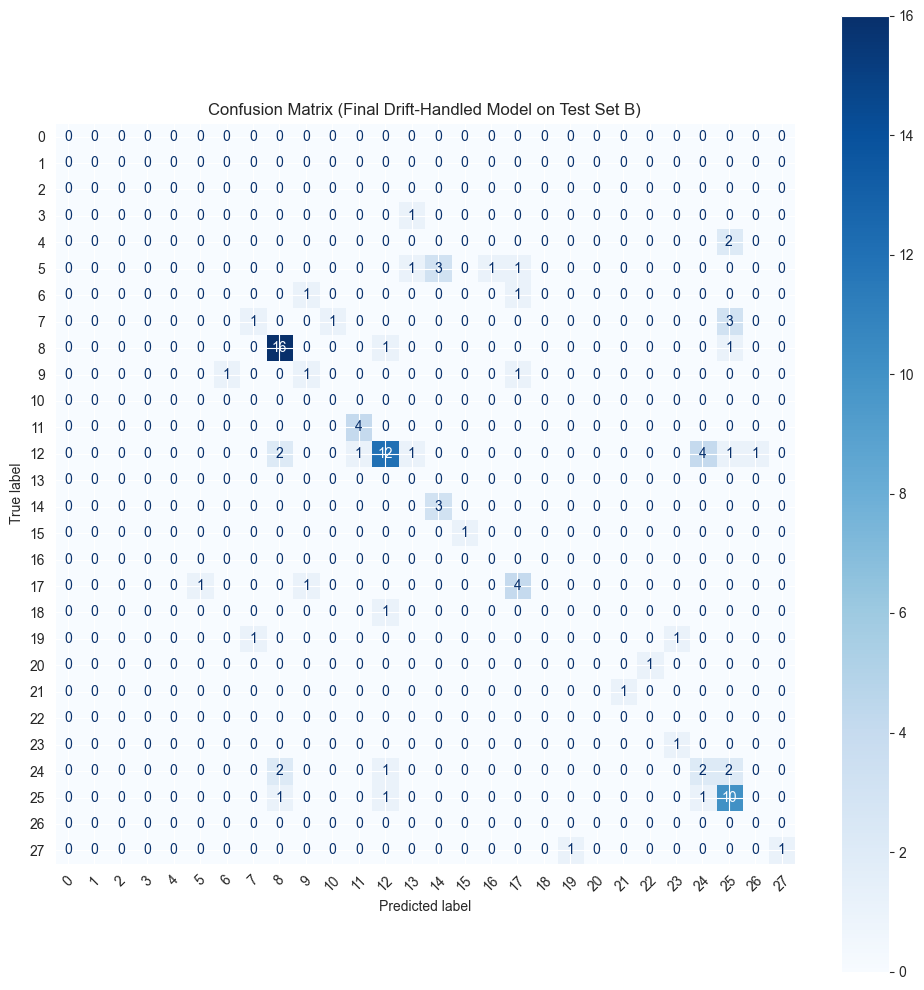

In [126]:
# 划分 Test2 为 A（概念偏移处理用）和 B（最终评估用）
X_test_labeled = X_test_2.iloc[:len(y_test_2_reduced)].copy()
X_test_A, X_test_B, y_test_A, y_test_B = train_test_split(
    X_test_labeled, y_test_2_reduced, test_size=0.5, random_state=42
)

# === IQR 离群值裁剪函数 ===
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# === 训练集预处理函数 ===
def preprocess_train(X, y):
    X_capped = winsorize_iqr(X)
    scaler = RobustScaler().fit(X_capped)
    X_scaled = scaler.transform(X_capped)
    smote = SMOTE(k_neighbors=3, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y.values.ravel())
    return X_scaled, X_resampled, y_resampled, scaler

# === 测试集预处理函数 ===
def preprocess_test(X, scaler):
    X_capped = winsorize_iqr(X)
    return scaler.transform(X_capped)

# 执行预处理
X_train_scaled, X_train_resampled, y_train_resampled, scaler = preprocess_train(X_train, y_train)
X_test_A_scaled = preprocess_test(X_test_A, scaler)
X_test_B_scaled = preprocess_test(X_test_B, scaler)

# === 协变量偏移处理（Domain Classifier）===
X_domain = np.vstack([X_train_scaled, X_test_A_scaled])
y_domain = np.array([0] * len(X_train_scaled) + [1] * len(X_test_A_scaled))

domain_clf = LogisticRegression(max_iter=1000)
domain_clf.fit(X_domain, y_domain)

p_test = domain_clf.predict_proba(X_train_resampled)[:, 1]
p_train = 1 - p_test
importance_weights = p_test / (p_train + 1e-6)

# === 标签偏移处理函数 ===
def estimate_confusion_matrix(model, X_val, y_val, num_classes):
    pred = model.predict(X_val)
    cm = confusion_matrix(y_val, pred, labels=range(num_classes))
    cm_norm = cm / cm.sum(axis=1, keepdims=True)
    return np.nan_to_num(cm_norm).T

def compute_avg_prediction(model, X_test):
    return model.predict_proba(X_test).mean(axis=0)

def adjust_predictions(model, X_test, test_priors, train_priors):
    proba = model.predict_proba(X_test)
    ratio = test_priors / (train_priors + 1e-8)
    adjusted = proba * ratio
    adjusted /= adjusted.sum(axis=1, keepdims=True)
    return np.argmax(adjusted, axis=1)

# 临时模型训练
model_temp = XGBClassifier(objective='multi:softprob', num_class=28,
                           eval_metric='mlogloss', n_estimators=100, random_state=42)
model_temp.fit(X_train_resampled, y_train_resampled, sample_weight=importance_weights)

# 标签偏移处理：估计 C^T 和测试先验分布
X_val, _, y_val, _ = train_test_split(X_train_scaled, y_train, test_size=0.8, stratify=y_train, random_state=42)
C_T = estimate_confusion_matrix(model_temp, X_val, y_val, 28)
avg_test_pred = compute_avg_prediction(model_temp, X_test_B_scaled)
q_test = np.linalg.lstsq(C_T, avg_test_pred, rcond=None)[0]
q_test = np.clip(q_test, 0, 1)
q_test /= q_test.sum()

train_prior = y_train.value_counts(normalize=True).sort_index()
train_prior_arr = np.array([train_prior.get(i, 0) for i in range(28)])

# === 概念偏移处理（只用 X_test_A 有标签部分）===
X_combined = np.vstack([X_train_resampled, X_test_A_scaled])
y_combined = np.concatenate([y_train_resampled, y_test_A.values.ravel()])
sample_weights_combined = np.concatenate([
    importance_weights,
    np.ones(len(y_test_A)) * 3.0
])

# 训练最终模型（无数据泄露）
final_model = XGBClassifier(objective='multi:softprob', num_class=28,
                            eval_metric='mlogloss', n_estimators=100, random_state=42)
final_model.fit(X_combined, y_combined, sample_weight=sample_weights_combined)

# 最终评估（仅用 X_test_B 和 y_test_B）
y_pred_adjusted = adjust_predictions(final_model, X_test_B_scaled, q_test, train_prior_arr)

# 输出评估结果
f1_macro = f1_score(y_test_B, y_pred_adjusted, average='macro')
f1_weighted = f1_score(y_test_B, y_pred_adjusted, average='weighted')
accuracy = accuracy_score(y_test_B, y_pred_adjusted)


print("\n=== Classification Report (Final Drift-Handled Model on Test Set B) ===")
print(classification_report(y_test_B, y_pred_adjusted, zero_division=0))
print(f"F1 Macro:    {f1_macro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")
print(f"Accuracy:    {accuracy:.4f}")

# 混淆矩阵
cm = confusion_matrix(y_test_B, y_pred_adjusted, labels=range(28))
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix (Final Drift-Handled Model on Test Set B)")
plt.tight_layout()
plt.show()

In [ ]:
# 处理covariate shift + concept shift


=== Classification Report (Final Model: Covariate + Concept Drift Only) ===
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.33      0.33      0.33         6
           6       0.25      0.50      0.33         2
           7       0.50      0.20      0.29         5
           8       0.74      0.78      0.76        18
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         4
          12       0.75      0.55      0.63        22
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         3
          15       1.00      1.00      1.00         1
          17       0.57      0.67      0.62         6
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
    

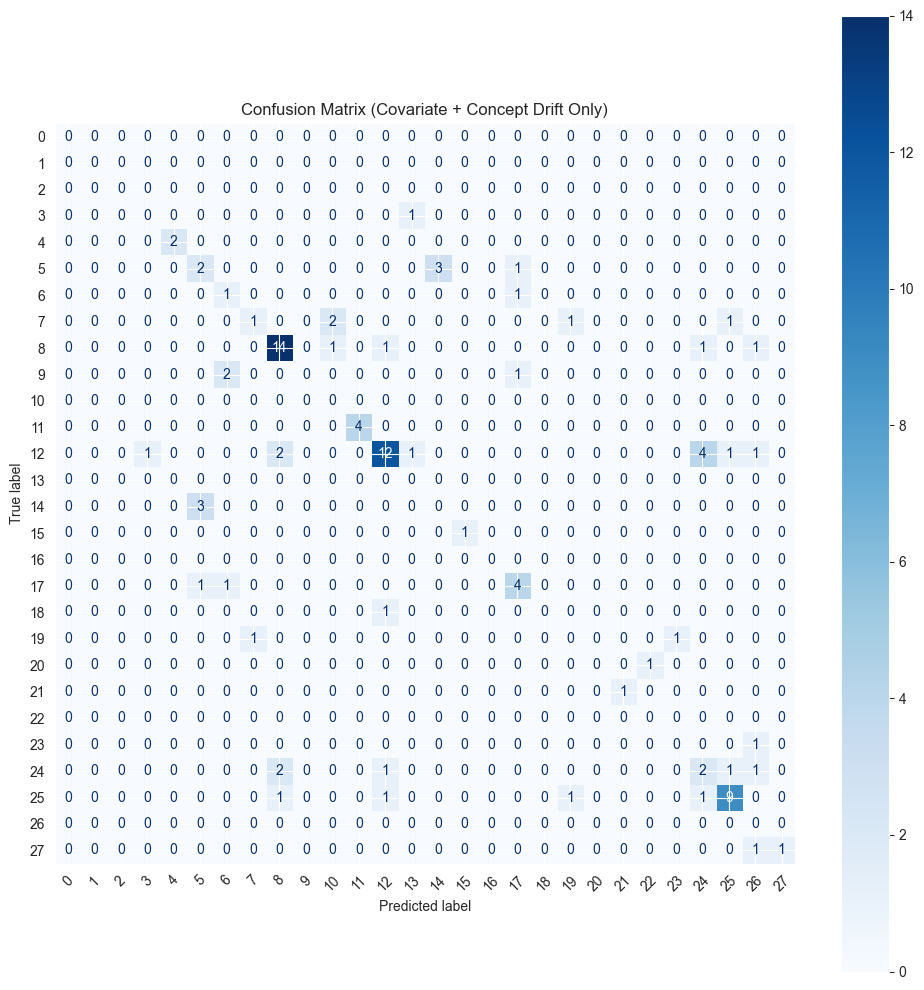

In [127]:
# === Step 1: 离群值处理函数 ===
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# === Step 2: 数据预处理函数 ===
def preprocess_train(X, y):
    X_capped = winsorize_iqr(X)
    scaler = RobustScaler().fit(X_capped)
    X_scaled = scaler.transform(X_capped)
    smote = SMOTE(k_neighbors=3, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y.values.ravel())
    return X_scaled, X_resampled, y_resampled, scaler

def preprocess_test(X, scaler):
    X_capped = winsorize_iqr(X)
    X_scaled = scaler.transform(X_capped)
    return X_scaled

# === Step 3: 训练/测试划分和预处理 ===
X_test_labeled = X_test_2.iloc[:len(y_test_2_reduced)].copy()
X_test_A, X_test_B, y_test_A, y_test_B = train_test_split(
    X_test_labeled, y_test_2_reduced, test_size=0.5, random_state=42
)

X_train_scaled, X_train_resampled, y_train_resampled, scaler = preprocess_train(X_train, y_train)
X_test_A_scaled = preprocess_test(X_test_A, scaler)
X_test_B_scaled = preprocess_test(X_test_B, scaler)

# === Step 4: 协变量偏移处理（Domain Classifier）===
X_domain = np.vstack([X_train_scaled, X_test_A_scaled])
y_domain = np.array([0] * len(X_train_scaled) + [1] * len(X_test_A_scaled))

domain_clf = LogisticRegression(max_iter=1000)
domain_clf.fit(X_domain, y_domain)

p_test = domain_clf.predict_proba(X_train_resampled)[:, 1]
p_train = 1 - p_test
importance_weights = p_test / (p_train + 1e-6)

# === Step 5: 概念偏移处理（合并训练 + 有标签测试集A）===
X_combined = np.vstack([X_train_resampled, X_test_A_scaled])
y_combined = np.concatenate([y_train_resampled, y_test_A.values.ravel()])
sample_weights_combined = np.concatenate([
    importance_weights,
    np.ones(len(y_test_A)) * 3.0  # 可以视情况调整权重
])

# === Step 6: 训练最终模型 ===
final_model = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    n_estimators=100,
    random_state=42
)
final_model.fit(X_combined, y_combined, sample_weight=sample_weights_combined)

# === Step 7: 最终评估（直接预测） ===
y_pred = final_model.predict(X_test_B_scaled)

# === Step 8: 输出评估结果 ===
print("\n=== Classification Report (Final Model: Covariate + Concept Drift Only) ===")
print(classification_report(y_test_B, y_pred, zero_division=0))
print(f"F1 Macro:    {f1_score(y_test_B, y_pred, average='macro'):.4f}")
print(f"F1 Weighted: {f1_score(y_test_B, y_pred, average='weighted'):.4f}")
print(f"Accuracy:    {accuracy_score(y_test_B, y_pred):.4f}")

# === Step 9: 可视化混淆矩阵 ===
cm = confusion_matrix(y_test_B, y_pred, labels=range(28))
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix (Covariate + Concept Drift Only)")
plt.tight_layout()
plt.show()


In [ ]:
# 只处理 covariate shift


=== Classification Report (Weighted Training Only) ===
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.22      0.50      0.31         4
           5       0.44      0.89      0.59         9
           6       0.50      1.00      0.67         3
           7       1.00      0.50      0.67        14
           8       0.76      0.76      0.76        29
           9       0.00      0.00      0.00         3
          10       0.13      1.00      0.24         2
          11       0.88      0.78      0.82         9
          12       0.71      0.58      0.64        43
          13       0.33      1.00      0.50         1
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         1
          17       0.89      0.80      0.84        10
          18       0.00      0.00      0.00         1
          19       0.50  

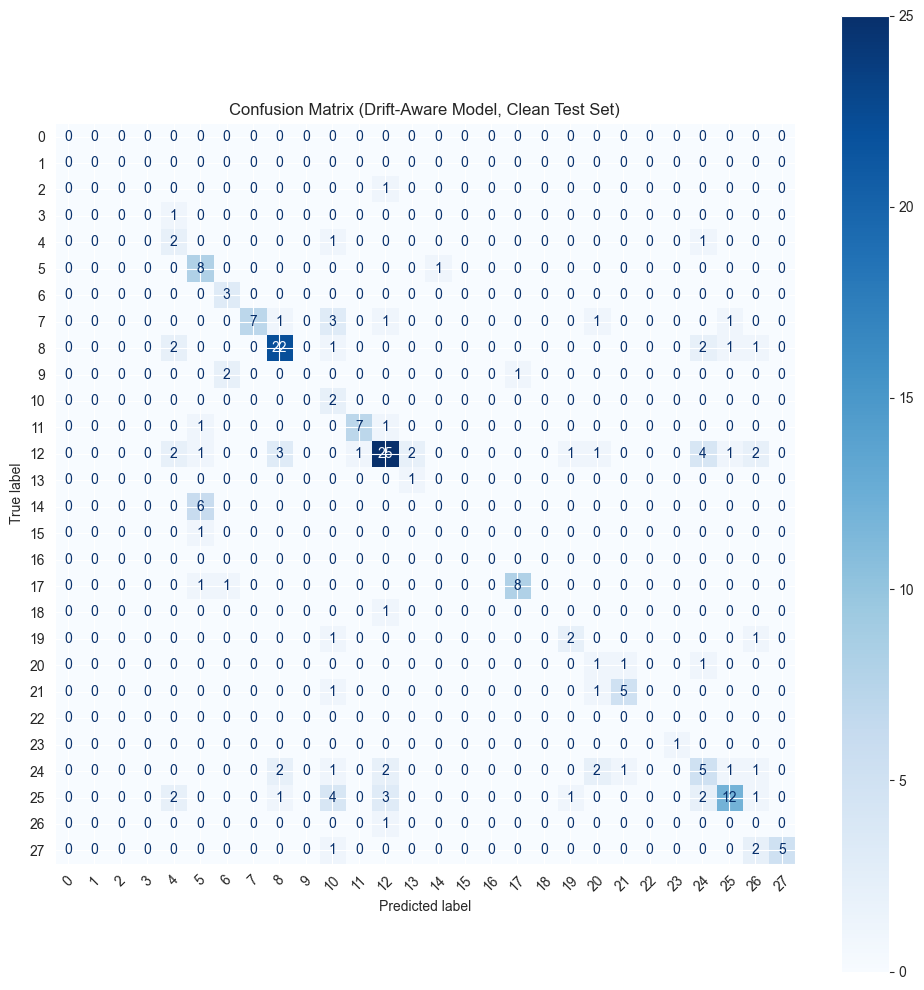

In [112]:
# === Step 1: 离群值处理函数 ===
def winsorize_iqr(df, lower=1.5, upper=1.5):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower * IQR
        upper_bound = Q3 + upper * IQR
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# === Step 2: 数据预处理函数 ===
def preprocess_train(X, y):
    X_capped = winsorize_iqr(X)
    scaler = RobustScaler().fit(X_capped)
    X_scaled = scaler.transform(X_capped)
    smote = SMOTE(k_neighbors=3, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y.values.ravel())
    return X_scaled, X_resampled, y_resampled, scaler

def preprocess_test(X, scaler):
    X_capped = winsorize_iqr(X)
    X_scaled = scaler.transform(X_capped)
    return X_scaled

# === Step 3: 执行训练/测试预处理 ===
X_train_scaled, X_train_resampled, y_train_resampled, scaler = preprocess_train(X_train, y_train)
X_test_scaled = preprocess_test(X_test_2, scaler)

# === Step 4: Domain Classifier 建立协变量偏移权重 ===
X_domain = np.vstack([X_train_scaled, X_test_scaled])
y_domain = np.array([0]*len(X_train_scaled) + [1]*len(X_test_scaled))

domain_clf = LogisticRegression(max_iter=1000)
domain_clf.fit(X_domain, y_domain)

# 在 SMOTE 后训练数据上预测 importance weight
p_test = domain_clf.predict_proba(X_train_resampled)[:, 1]
p_train = 1 - p_test
importance_weights = p_test / (p_train + 1e-6)

# === Step 5: 使用 weighted training 训练模型（不包含测试集） ===
model = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    n_estimators=100,
    random_state=42
)
model.fit(X_train_resampled, y_train_resampled, sample_weight=importance_weights)

# === Step 6: 评估模型（在纯净测试集上） ===
X_test_used = X_test_scaled[:len(y_test_2_reduced)]
y_pred = model.predict(X_test_used)

# === Step 7: 输出评估结果 ===
print("\n=== Classification Report (Weighted Training Only) ===")
print(classification_report(y_test_2_reduced, y_pred, zero_division=0))
print(f"F1 Macro:    {f1_score(y_test_2_reduced, y_pred, average='macro'):.4f}")
print(f"F1 Weighted: {f1_score(y_test_2_reduced, y_pred, average='weighted'):.4f}")
print(f"Accuracy:    {accuracy_score(y_test_2_reduced, y_pred):.4f}")

# === Step 8: 混淆矩阵可视化 ===
cm = confusion_matrix(y_test_2_reduced, y_pred, labels=range(28))
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix (Drift-Aware Model, Clean Test Set)")
plt.tight_layout()
plt.show()

In [ ]:
# ******************************   Distribution shift finished   ******************************